In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext nb_black


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [9]:
df = pd.read_csv("../data/clean/imdb_clean.csv").sort_values("GrossRevenue", ascending=False)[:1000]

## What Genres tend to be most heavily represented in the top 1000 movies?

Here, we calculate the average of each of the dummy columns to get the proportion of the top 1000 movies that identify as each genre.

[Text(0.5, 1.0, 'Percentage of Top 1000 US Grossing Movies by Genre')]

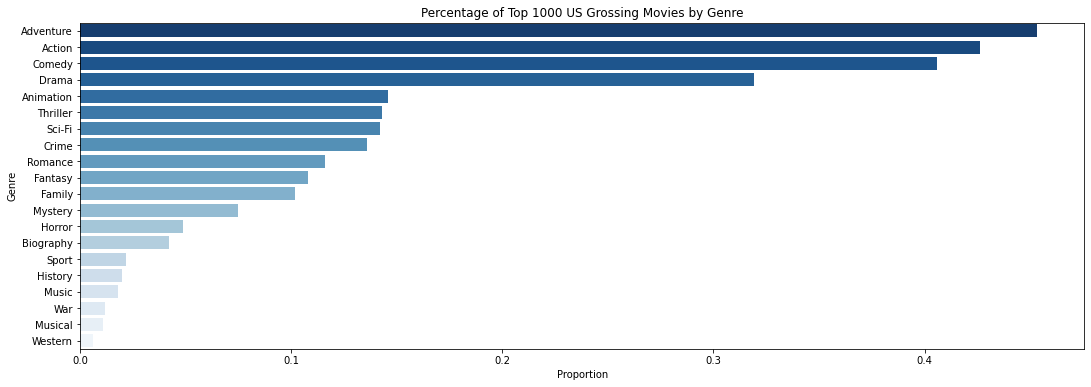

<IPython.core.display.Javascript object>

In [87]:
genre_props = (
    df[['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
    .mean()
    .reset_index()
    .rename(columns = {"index": "Genre", 0: "Proportion"})
    .sort_values("Proportion", ascending = False)
)

plt.figure(figsize=(18,6))
sns.barplot(data=genre_props,
            x = "Proportion",
            y = "Genre",
           orient = "h",
           palette = "Blues_r").set(title="Percentage of Top 1000 US Grossing Movies by Genre")

## When were most of these movies released?

In [88]:
counts_by_year_data = df.groupby("ReleaseYear")["Title"].count().reset_index()

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]),
 [Text(0, 0, '1935'),
  Text(1, 0, '1936'),
  Text(2, 0, '1937'),
  Text(3, 0, '1938'),
  Text(4, 0, '1939'),
  Text(5, 0, '1940'),
  Text(6, 0, '1941'),
  Text(7, 0, '1942'),
  Text(8, 0, '1943'),
  Text(9, 0, '1944'),
  Text(10, 0, '1945'),
  Text(11, 0, '1946'),
  Text(12, 0, '1947'),
  Text(13, 0, '1948'),
  Text(14, 0, '1949'),
  Text(15, 0, '1950'),
  Text(16, 0, '1951'),
  Text(17, 0, '1952'),
  Text(18, 0, '1953'),
  Text(19, 0, '1954'),
  Text(20, 0, '1955'),
  Text(21, 0, '1956'),
  Text(22, 0, '1957'),
  Text(23, 0, '1958'),
  Text(24, 0, '1959'),
  Text(25, 0, '1960'),
  Text(26, 0, 

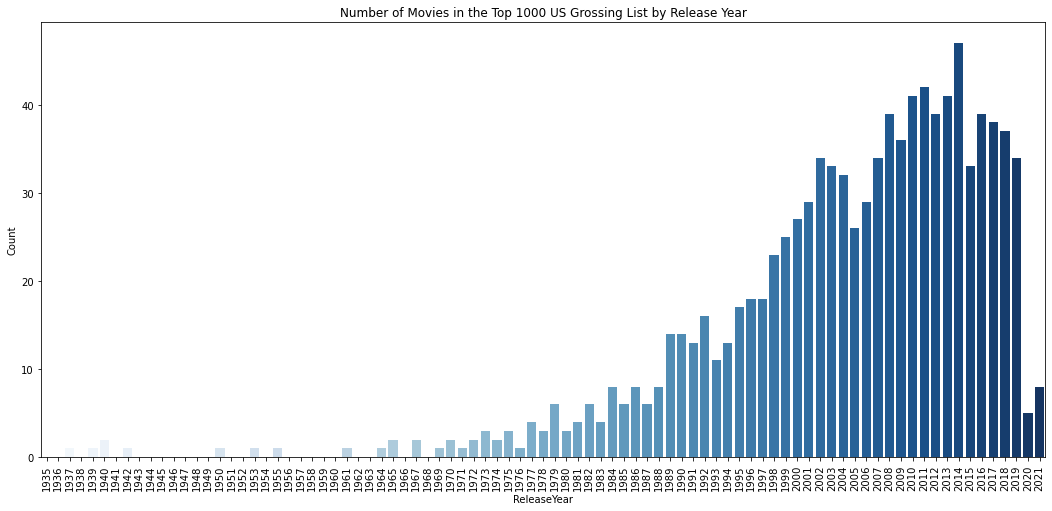

<IPython.core.display.Javascript object>

In [106]:
counts_by_year = {"ReleaseYear": list(range(1935,2022))}
counts_by_year = (pd
                  .DataFrame(counts_by_year)
                  .merge(counts_by_year_data,
                         on = "ReleaseYear",
                         how = "left")
                  .rename(columns = {"Title": "Count"}))

plt.figure(figsize=(18,8))
sns.barplot(data=counts_by_year,
            x = "ReleaseYear",
            y = "Count",
            palette = "Blues").set(title="Number of Movies in the Top 1000 US Grossing List by Release Year")
plt.xticks(rotation=90)

## Some other options or ideas

* Average IMDB Rating by Genre (bar chart)
* Average Metascore by Genre (bar chart)
* Average US Grossing by Genre (bar chart)
* Average duration by Genre (bar chart)
* Relationship between IMDB rating and Income (scatter - should have this already?)